# Structural Analysis Toolkit (SAT)

## If anything goes wrong:  
### Restart the kernel using the &#8635; button at the top of this notebook, or from the menu: `Kernel > Restart Kernel...`

## **During the tutorials just run through the cells using the given example files and code. Later you will use your own CAD drawing and edit the code to solve your own structural optimisation problem.**

## Loading the external files

### 0. Upload your DXF file (the example used here is called `example.dxf`), to the file browser on the left.
### 1. Run the cell below to load it into Python and create lists of `Node` and `Member` objects.

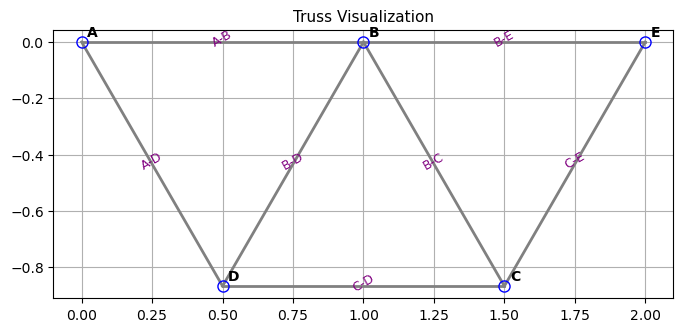

In [1]:
# ===================================================
# Ensure the input filenames below match uploded files
# ===================================================
from import_functions import extract_structure_from_dxf

# input files
INPUT_DXF = "example.dxf"

# import data and create lists of nodes and members, each with its own ID, name, properties, etc...
nodes, members = extract_structure_from_dxf(INPUT_DXF, units='mm', tol=0.1)

##########################################
# Visualisation of the imported structure
##########################################
import visualisation_functions as viz

# show the imported structure
viz.visualize_truss(nodes, members, textscale=1, show_node_labels=True, show_member_labels=True)

#### &bullet; **Make sure all of the members and joints have unique labels,**
#####      $-$ if not you need to edit your CAD drawing to make it more accurate.

* We can inspect the nodes (and members) created:

In [2]:
# list the nodes
print(nodes)

{'A': <structural_classes.Node object at 0x71ef5421afc0>, 'B': <structural_classes.Node object at 0x71ef4d171790>, 'C': <structural_classes.Node object at 0x71ef5b6eb530>, 'D': <structural_classes.Node object at 0x71ef542793d0>, 'E': <structural_classes.Node object at 0x71ef90112c60>}


This is a dictionary with each of the nodes listed, lets look at one:
* click immediately after `.` and press the tab key to view attributes (properties) of the node object
* click on any of them (or type it) to view that property
e.g.:
```python
node.F_x
```

In [3]:
node = nodes['C']
node.connectivity

['D', 'B', 'E']

### 2. Edit the dictionary in the cell below then run it to assign different joint types:

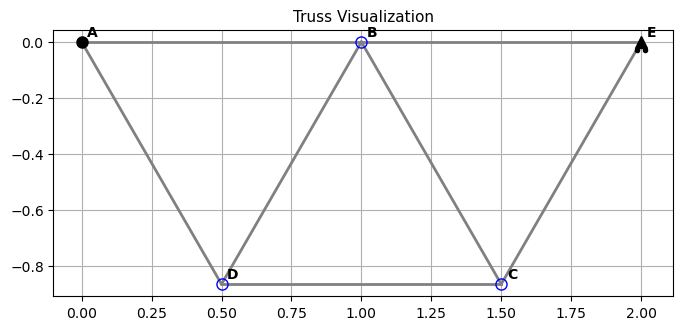

In [4]:
##########################################
# Edit this to assign conditions to joints
##########################################

# comma-separated lists of node-labels as dictionary values 
# default value is "Pinned"
JOINT_CONDITIONS = {
"Pinned":            [],	     # Internal pin (free rotation, no support)	    ○	Blue
"Fixed":             [],         # Internal fixed joint (rigid)	                □	~Blue
"Reaction_Fixed":    [],	     # External fixed support	                    ■	Black
"Reaction_Pinned":   ['A'],      # External pinned support	                    ●	Black
"Reaction_Roller_H": ['E'],      # Horizontal roller (restrained vertically)	▲	Black
"Reaction_Roller_V": []	         # Vertical roller (restrained horizontally)	▼	Black
}

#########################
# Assign point conditions 
#########################
from struct_prop_funcs import apply_joint_conditions

# assign joint conditions
apply_joint_conditions(nodes, JOINT_CONDITIONS)

viz.visualize_truss(nodes, members, show_node_labels=True)

| Type                | Description                               | Marker | Colour |
| ------------------- | ----------------------------------------- | ------ | ----- |
| `Pinned`            | Internal pin (free rotation, no support)  | ○      | Blue  |
| `Fixed`             | Internal fixed joint (rigid)              | □      | Blue  |
| `Reaction_Fixed`    | External fixed support                    | ■      | Black |
| `Reaction_Pinned`   | External pinned support                   | ●      | Black |
| `Reaction_Roller_H` | Horizontal roller (restrained vertically) | ▲      | Black |
| `Reaction_Roller_V` | Vertical roller (restrained horizontally) | ▼      | Black |

### 3. Import the Materials list and properties from the `materials.xlsx` Excel file
* To edit your own: Download the `materials.xlsx` file (right-click in the file browser on the left) edit and re-upload (drag and drop into the file-browser or use the up arrow &uarr; above the file list). **Do not change the basic formatting of the excel sheet**, only add new rows or properties columns if needed.
### Run the cell below to import the file and display its contents


In [5]:
from import_functions import read_materials_from_excel

MATERIAL_EXCEL = "materials.xlsx"  # path to your file

# import materials -> dataframe keyed by material name
material_props_df = read_materials_from_excel(MATERIAL_EXCEL, print_contents=False)
material_props_df

Label,114.3 x 10 CHS - S355,254x343x63 - T - S355,100x100 C14
Type,Steel,Steel,Timber
E,210.0,210.0,10.0
Density,7850.0,7850.0,350.0
fc,355.0,355.0,14.0
ft,355.0,355.0,8.0
A,3.94,79.7,100.0
I_xx,450.0,2190.0,833.333333
I_yy,450.0,8980.0,833.333333
y_xx,57.15,8.85,5.0
y_yy,10,3,5


### 4.  Manual Configuration of Properties for `members`

### Edit the dictionaries in the cell below then run it to assign different joint and material properties:

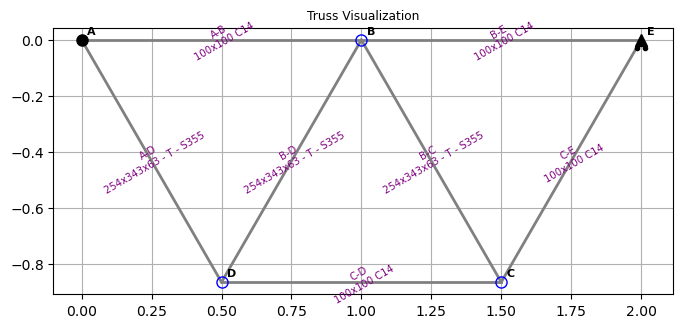

    Assigned Member Material Properties
 ---------------------------------------
                     Material      E     fc     ft Density    Type      A  \
Member                                                                      
A-B               100x100 C14   10.0   14.0    8.0   350.0  Timber  100.0   
B-E               100x100 C14   10.0   14.0    8.0   350.0  Timber  100.0   
A-D     254x343x63 - T - S355  210.0  355.0  355.0  7850.0   Steel   79.7   
B-D     254x343x63 - T - S355  210.0  355.0  355.0  7850.0   Steel   79.7   
C-D               100x100 C14   10.0   14.0    8.0   350.0  Timber  100.0   
B-C     254x343x63 - T - S355  210.0  355.0  355.0  7850.0   Steel   79.7   
C-E               100x100 C14   10.0   14.0    8.0   350.0  Timber  100.0   

               I_xx         I_yy  y_xx  y_yy  
Member                                        
A-B      833.333333   833.333333  5.00   5.0  
B-E      833.333333   833.333333  5.00   5.0  
A-D     2190.000000  8980.000000  8.8

In [6]:
##########################################
# Edit this to assign materials to members 
#  * Note: names are very sensitive to number of spaces and upper/lower-case letters
##########################################

MANUAL_MATERIALS = {
#"114.3 x 10 CHS - S355": ["A-B", "B-E"],
"254x343x63 - T - S355": ["A-D", "B-D", "B-C"],
}

# any unassigned materials will get this one:
DEFAULT_MATERIAL = "100x100 C14"

##################
# Assign materials 
##################
from struct_prop_funcs import assign_materials_to_members
from printing_tools import member_dataframe


# assign materials: only names that exist in Excel will be assigned; others -> None
assign_materials_to_members(members, MANUAL_MATERIALS, material_props_df, default_material=DEFAULT_MATERIAL)

# Plot a figure of the new truss system
viz.visualize_truss(nodes, members, show_node_labels=True, show_member_labels=True, show_material_labels=True, textscale=0.8)

# show table and export
df = member_dataframe(members)

MEMBER_PROPERTY_FILE = "member_properties.xlsx"
# save member properties to excel
df.to_excel(MEMBER_PROPERTY_FILE)

## Next follows some examples of what you can do with your structural objects...

### 5. Check if Determinate

#### 2D truss diagnostics with automatic connectivity and total unknown reaction check.

Prints a detailed report including:
- Determinacy check
- Support reaction analysis
- Potential mechanism nodes
- Total unknown reaction check

In [7]:
n_nodes = len(nodes)
n_members = len(members)
n_reactions = sum(n.unknowns for n in nodes.values())
determinant = 2 * n_nodes - (n_members + n_reactions)

print("\n=== Truss Diagnostics ===")
print(f"Number of nodes (joints):       {n_nodes}")
print(f"Number of members:             {n_members}")
print(f"Number of unknown reactions:   {n_reactions}")
print(f"Determinant (2j - (m+r)):     {determinant}")
# --- Overall determinacy status (truss) ---
if determinant == 0:
    status = "=> Statically determinate (truss)"
elif determinant > 0:
    status = "!!! Unstable mechanism possible (truss)"
else:
    status = "!!! Statically indeterminate (truss)"
print(f"Status: {status}\n")

# --- Support analysis ---
print("Supports and unknown reaction components:")
problem_supports = []
for label, n in nodes.items():
    cond = n.condition
    if "Reaction" in cond: 
        unknowns = n.unknowns
        print(f"  Node {label:>3}: {cond:20} -> {unknowns} unknown reaction(s)")
        if unknowns > 2:
            problem_supports.append((label, cond, "Too many unknown reactions → may cause indeterminacy"))

if problem_supports:
    print("\nProblematic Supports:")
    for label, cond, issue in problem_supports:
        print(f"  Node {label:>3}: {cond:20} -> {issue}")
else:
    print("\nNo problematic supports detected.")

# Total unknown reaction check for rigid 2D body
print("\nTotal unknown reaction check:")
if n_reactions > 3:
    print(f"!!! Total unknown reactions = {n_reactions} > 3 --> system is statically indeterminate for rigid 2D body")
elif n_reactions < 3:
    print(f"!!! Total unknown reactions = {n_reactions} < 3 --> system may be unstable (mechanism possible)")
else:
    print(f"=> Total unknown reactions = {n_reactions} --> statically determinate for rigid 2D body")

# Potential mechanism nodes
potential_mech_nodes = []
for label, n in nodes.items():
    cond = n.condition
    if "Reaction" in cond:
        continue  # skip supports
    n_conn = len(n.connectivity) #number of members from the node
    if n_conn < 2:
        potential_mech_nodes.append((label, n_conn, "Too few connected members --> possible local mechanism"))

if potential_mech_nodes:
    print("\nPotential Mechanism Nodes:")
    for label, n_conn, issue in potential_mech_nodes:
        print(f"  Node {label}: {n_conn} member(s) connected -> {issue}")
else:
    print("\nNo obvious local mechanism nodes detected.")




=== Truss Diagnostics ===
Number of nodes (joints):       5
Number of members:             7
Number of unknown reactions:   3
Determinant (2j - (m+r)):     0
Status: => Statically determinate (truss)

Supports and unknown reaction components:
  Node   A: Reaction_Pinned      -> 2 unknown reaction(s)
  Node   E: Reaction_Roller_H    -> 1 unknown reaction(s)

No problematic supports detected.

Total unknown reaction check:
=> Total unknown reactions = 3 --> statically determinate for rigid 2D body

No obvious local mechanism nodes detected.


## Do Structural Calculations

### 6. Define the loads and run the cell below to perform load calculations

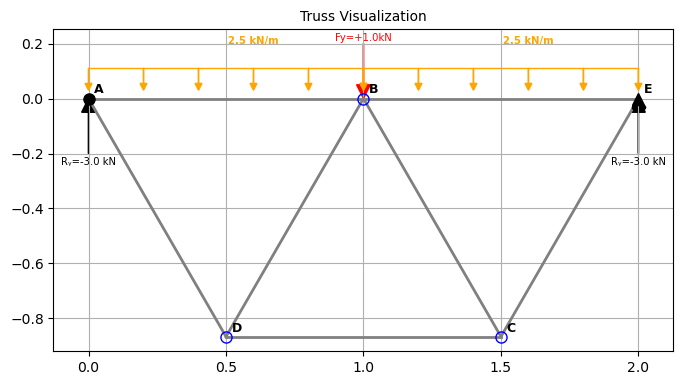

In [8]:
# ==========================
#   LOAD ASSIGNMENT
# ==========================

P = 5
# Point load configuration
#nodes['C'].F_y = P # F_x is already zero
nodes['B'].F_y = 1

UDL = 2.5
wind = 6
# member loads
members['A-B'].F_y = UDL # 2.5 kN/m down UDL on member AB
members['B-E'].F_y = UDL # 2.5 kN/m down UDL on member AD
#members['C-E'].F_x = -wind # 2.5 kN/m down UDL on member AD

# ==============================
# PERFORM LOAD CALCULATIONS HERE
# ==============================
from struct_prop_funcs import calculate_total_forces
from structural_analysis import compute_support_reactions


# Apply loads
calculate_total_forces(nodes, members) 

reactions = compute_support_reactions(nodes, verbose=False)

# Visualize
viz.visualize_truss(nodes, members, textscale=0.9, show_reactions=True, plot_loads=True, show_load_labels=True, show_node_labels=True,  show_force_labels=True)

In [9]:
print(reactions)

{'A': {'Rx': 0.0, 'Ry': -2.999999999999999}, 'E': {'Rx': 0.0, 'Ry': -2.9999999999999987}}


### 7. Check Equilbrium

In [10]:
# Step 6: Detailed moment equilibrium check (debug)
print("\n--- Moment Equilibrium Breakdown (Clockwise Positive) ---")
print(f"{'Label':<8} {'x':>8} {'y':>8} {'Fx':>10} {'Fy':>10} {'M = (xFy + yFx)':>18}")

# Applied loads (clockwise positive)
for lbl, n in nodes.items():
    Fx = n.F_xtotal or n.F_x #uses F_xtotal if it exists, F_x otherwise
    Fy = n.F_ytotal or n.F_y
    x, y = n.coords[:2]
    M = (x * Fy + y * Fx)  # negative for clockwise positive
    print(f"{lbl:<8} {x:8.3f} {y:8.3f} {Fx:10.3f} {Fy:10.3f} {M:18.6f}")

# Supports and reactions
support_labels = [lbl for lbl in reactions.keys()]
support_nodes = {lbl: nodes[lbl] for lbl in support_labels}

print("---- Reactions (Clockwise Positive) ----")
for lbl, r in reactions.items():
    s = support_nodes[lbl]
    x, y = s.coords[:2]
    M = (x * r['Ry'] + y * r['Rx'])  # clockwise positive
    print(f"{lbl:<8} {x:8.3f} {y:8.3f} {r['Rx']:10.3f} {r['Ry']:10.3f} {M:18.6f}")

# Compute totals (clockwise positive)
M_total_loads = sum(
    n.coords[0] * (n.F_ytotal or n.F_y)
    + n.coords[1] * (n.F_xtotal or n.F_x)
    for n in nodes.values()
)
M_total_reac = sum(
    support_nodes[l].coords[0] * r['Ry']
    + support_nodes[l].coords[1] * r['Rx']
    for l, r in reactions.items()
)
M_check = M_total_loads + M_total_reac

print(f"\nM_total (loads, CW+) = {M_total_loads:.6f}")
print(f"M_reactions (CW+)   = {M_total_reac:.6f}")
print(f"ΣM (CW+) = {M_check:.6f}  (should be ≈ 0)\n")




--- Moment Equilibrium Breakdown (Clockwise Positive) ---
Label           x        y         Fx         Fy    M = (xFy + yFx)
A           0.000    0.000      0.000      1.250           0.000000
B           1.000    0.000      0.000      3.500           3.500000
C           1.500   -0.866      0.000      0.000           0.000000
D           0.500   -0.866      0.000      0.000           0.000000
E           2.000    0.000      0.000      1.250           2.500000
---- Reactions (Clockwise Positive) ----
A           0.000    0.000      0.000     -3.000           0.000000
E           2.000    0.000      0.000     -3.000          -6.000000

M_total (loads, CW+) = 6.000000
M_reactions (CW+)   = -6.000000
ΣM (CW+) = 0.000000  (should be ≈ 0)



### 8. Use method of joints to solve axial forces

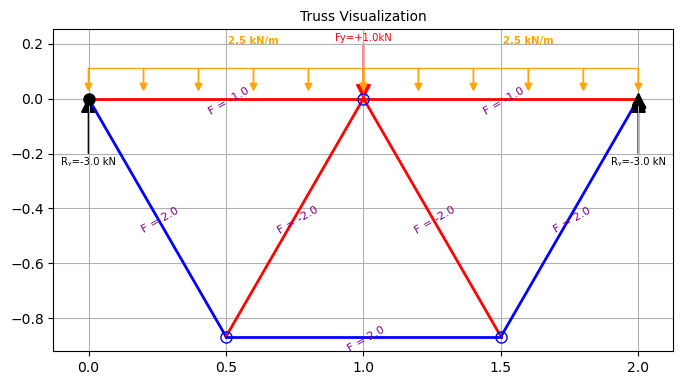

In [11]:
from structural_analysis import solve_truss_joint_iteration


# STRUCTURAL ANALYSIS
member_forces = solve_truss_joint_iteration(nodes, members)

# Visualize everything
viz.visualize_truss(nodes, members, textscale=0.9, show_reactions=True, plot_loads=True, show_node_labels=True, show_load_labels=True, show_forces=True, show_force_labels=True)

### 9. Compute and visualise member bending moments

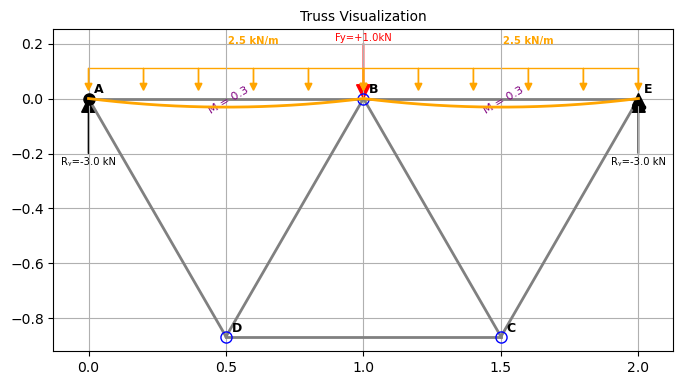

In [22]:
from structural_analysis import compute_member_bending_moments

member_moments = compute_member_bending_moments(members)

viz.visualize_truss(nodes, members, 
                    textscale=0.9, 
                    show_reactions=True, 
                    plot_loads=True, 
                    show_load_labels=True, 
                    show_node_labels=True,
                    show_bending_moments=True, 
                    show_bending_moment_labels=True, 
                    moment_scale=0.1)

In [23]:
members['B-E'].moments

{'M_start': 0.0,
 'M_end': 0.0,
 'M_max': 0.3125,
 'M_min': 0.0,
 'points': [0.0,
  0.062326869806094184,
  0.11772853185595568,
  0.16620498614958448,
  0.2077562326869806,
  0.24238227146814403,
  0.2700831024930748,
  0.29085872576177285,
  0.3047091412742382,
  0.31163434903047094,
  0.3116343490304709,
  0.3047091412742382,
  0.2908587257617729,
  0.2700831024930748,
  0.2423822714681441,
  0.20775623268698062,
  0.16620498614958454,
  0.11772853185595578,
  0.06232686980609424,
  0.0],
 'Fx_udl': 0.0,
 'Fy_udl': 2.5}

## Next Steps... Do interesting things!

### 10. Calculates Stresses:

We need to account for the plus/minus effect:

σ total= σ axial ± σ bending

Tension axial stress + bending at the top fiber
Compression axial stress + bending at the top fiber

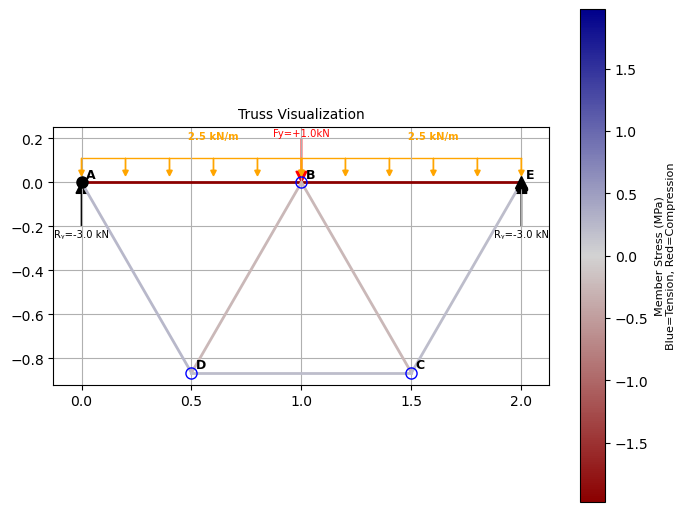

In [24]:
### Compute combined stresses (axial + bending) for all members.
### =======
### MODEL ANSWER???
### ==========
import numpy as np 

def calculate_stresses(members):
    stresses = {}
    max_stress = 0.0
    for m in members.values():
        if m.rotation==0:
            props = m.properties
            A = props['A'] 
            I = props['I_xx'] 
            y = props['y_xx']
        else: 
            props = m.properties
            A = props['A'] 
            I = props['I_yy'] 
            y = props['y_yy']
    
        # Axial stress
        F = m.force 
        sigma_axial = (1e3*F) / (A*1e2)  # tension positive #N/mm^2
    
        # Bending stress
        sigma_bending_max_abs = 0.0
    
        moments = m.moments

        M_curve = moments["points"]
        if len(M_curve) > 0:
            M_max = moments["M_max"]
            M_min = moments["M_min"]
            M_max_abs = max(abs(M_max), abs(M_min))
            sigma_bending_max_abs = ((M_max_abs)*1e6) * (y*10) / (I*1e4)
    
        # Combined total stress (select most critical)
        sigma_total_pos = sigma_axial + sigma_bending_max_abs
        sigma_total_neg = sigma_axial - sigma_bending_max_abs
        sigma_total = sigma_total_pos if abs(sigma_total_pos) >= abs(sigma_total_neg) else sigma_total_neg
    
        m.stress = sigma_total
        stresses[m.name] = sigma_total
        max_stress = max(max_stress, abs(sigma_total))
    return max_stress, stresses

max_stress,stresses = calculate_stresses(members)

viz.visualize_truss(nodes, members, textscale=0.9, show_reactions=True, plot_loads=True, show_node_labels=True, show_load_labels=True, show_stresses=True, show_colorbar=True )


In [15]:
m = members['A-B']
m.stress

-1.976036297108185

### 11. Compute utilisation factors for members based on stress and material properties.


=== Utilisation Summary ===
Member       σ_total (MPa)     Allow (MPa)         Type     Utilisation
---------------------------------------------------------------------------
A-B                 -1.976          14.000  Compression           0.141
B-E                 -1.976          14.000  Compression           0.141
A-D                  0.254         355.000      Tension           0.001
B-D                 -0.254         355.000  Compression           0.001
C-D                  0.202           8.000      Tension           0.025
B-C                 -0.254         355.000  Compression           0.001
C-E                  0.202           8.000      Tension           0.025
---------------------------------------------------------------------------
Max utilisation = 0.141

=> All members within allowable limits.


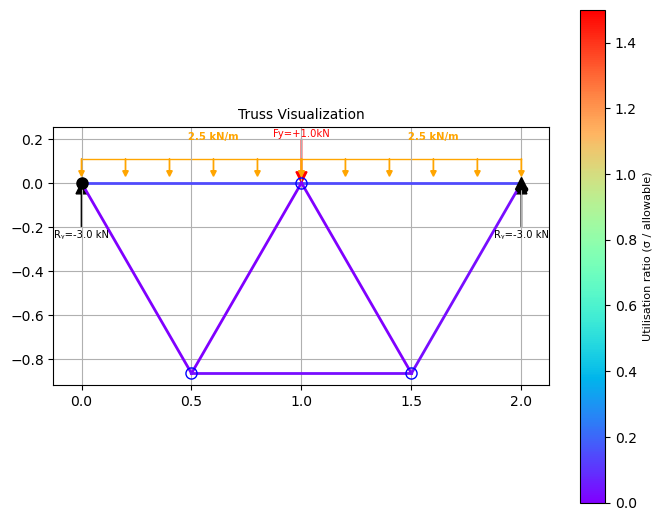

In [25]:
import math

def compute_utilisations(members):
    warn_limit=1.0
    utilisations = {}
    max_utilisation = 0.0
    overstressed = []
    
    # ANSI color helpers
    RED = "\033[91m"
    RESET = "\033[0m"
    
    print("\n=== Utilisation Summary ===")
    print(f"{'Member':<10} {'σ_total (MPa)':>15} {'Allow (MPa)':>15} {'Type':>12} {'Utilisation':>15}")
    print("-" * 75)
    
    for m in members.values():
        sigma = m.stress
        props = m.properties
    
        ft = props["ft"] 
        fc = props["fc"] 
    
        # Decide allowable stress based on sign
        if sigma >= 0:
            allowable = ft 
            stress_type = "Tension"
        else:
            allowable = fc 
            stress_type = "Compression"
    
        util = abs(sigma) / allowable
    
        utilisations[m.name] = util
        m.utilisation=util
        if not math.isinf(util):
            max_utilisation = max(max_utilisation, util)
    
        # Highlight overstressed members
        over = util > warn_limit
        allow_str = f"{allowable:.3f}" 
        util_str = f"{util:.3f}" 
    
        line = f"{m.name:<10} {sigma:15.3f} {allow_str:>15} {stress_type:>12} {util_str:>15}"
        if over:
            line = RED + line + RESET
            overstressed.append((m.name, util))
    
        print(line)
    
    print("-" * 75)
    print(f"Max utilisation = {max_utilisation:.3f}")
    
    if overstressed:
        print(f"\n!!!  Overstressed members (util > {warn_limit}):")
        for name, util in overstressed:
            print(f"  - {name}: {util:.3f}")
    else:
        print("\n=> All members within allowable limits.")
    return utilisations


utils1 = compute_utilisations(members)

viz.visualize_truss(nodes, members, textscale=0.9, show_reactions=True, plot_loads=True, show_load_labels=True, show_utilisations=True, show_colorbar=True )


## Making modifications to the structure

### 12. Run this to see and example of a structural change:

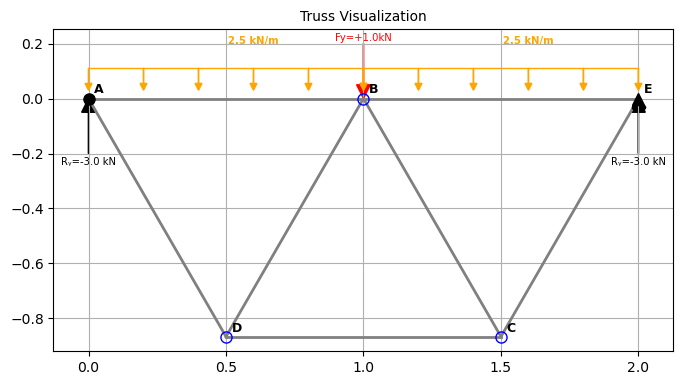

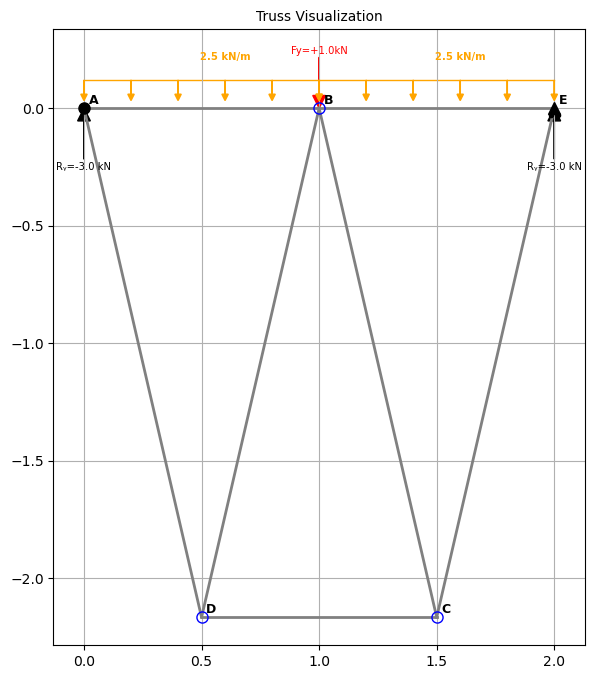

In [26]:
# Factor to stretch the structure
#WIDTH_SCALE = 2.5
HEIGHT_SCALE = 2.5

from copy import deepcopy
# deepcopy also makes a copy of all the objects within the dictionary
nodes2 = deepcopy(nodes)
members2 = deepcopy(members)
for m in members2.values():
    m.nodes=nodes2 

# scale and visualize
for n in nodes2.values():
    n.coords[1] *= HEIGHT_SCALE #same as: n.coords[1] = n.coords[1]*HEIGHT_SCALE

# Visualize
viz.visualize_truss(nodes, members, textscale=0.9, show_reactions=True, plot_loads=True, show_load_labels=True, show_node_labels=True)
viz.visualize_truss(nodes2, members2, textscale=0.9, show_reactions=True, plot_loads=True, show_load_labels=True, show_node_labels=True)

In [27]:
from computation_tools import compute_node_angles
from printing_tools import comparison_data

# Member lengths 
def member_lengths(members):
    lengths = {}
    for m in members.values():
        L = m.compute_length()
        lengths[m.name] = L
    return lengths


# Store original angles and lengths
original_lengths = member_lengths(members)
original_angles = compute_node_angles(nodes, members)


# calculate new angles and lengths
new_lengths = member_lengths(members2)
new_angles = compute_node_angles(nodes2, members2)

# Show the values as a table
df = comparison_data(original_angles, new_angles, original_lengths, new_lengths, print_output=False)

COMPARISON_SHEET_FILENAME = "compare_angles.xlsx"

# save data to excel
df.to_excel(COMPARISON_SHEET_FILENAME)
df

,Node,Member,Old Angle (°),New Angle (°),Old Length,New Length
Member Pair,,,,,,
A-B--A-D,A,A-B,60.0,76.996088,1.0,1.0
A-B--A-D,A,A-D,60.0,76.996088,1.0,2.222049
C-D--B-C,C,C-D,60.0,76.996088,1.0,1.0
C-D--C-E,C,C-D,120.0,103.003912,1.0,1.0
B-C--C-E,C,B-C,60.0,26.007824,1.0,2.222049
B-C--C-E,C,C-E,60.0,26.007824,1.0,2.222049
B-E--B-C,B,B-E,60.0,76.996088,1.0,1.0
B-D--B-C,B,B-D,60.0,26.007824,1.0,2.222049
A-D--B-D,D,A-D,60.0,26.007824,1.0,2.222049



--- Support Reactions ---
A: Rx=+0.000, Ry=-3.000
E: Rx=+0.000, Ry=-3.000

--- Equilibrium Check ---
ΣFx = +0.000e+00
ΣFy = +1.776e-15
ΣM  = +2.665e-15 (about A)

=== Utilisation Summary ===
Member       σ_total (MPa)     Allow (MPa)         Type     Utilisation
---------------------------------------------------------------------------
A-B                 -1.915          14.000  Compression           0.137
B-E                 -1.915          14.000  Compression           0.137
A-D                  0.225         355.000      Tension           0.001
B-D                 -0.225         355.000  Compression           0.001
C-D                  0.081           8.000      Tension           0.010
B-C                 -0.225         355.000  Compression           0.001
C-E                  0.180           8.000      Tension           0.022
---------------------------------------------------------------------------
Max utilisation = 0.137

=> All members within allowable limits.


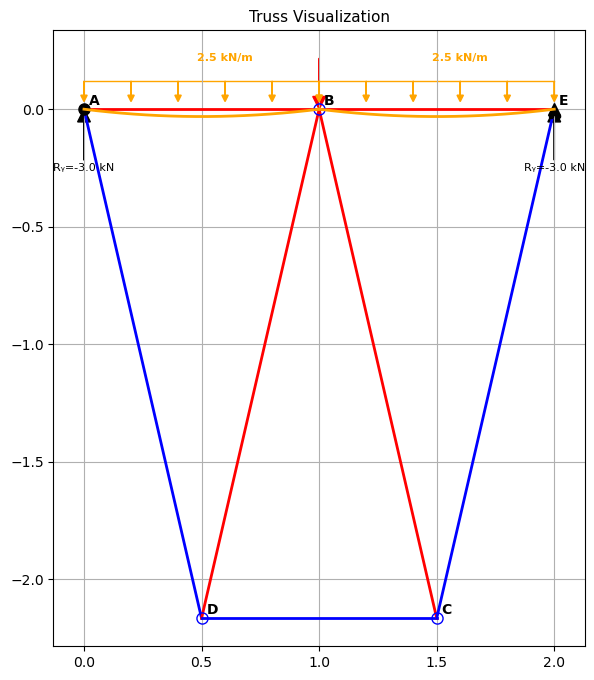

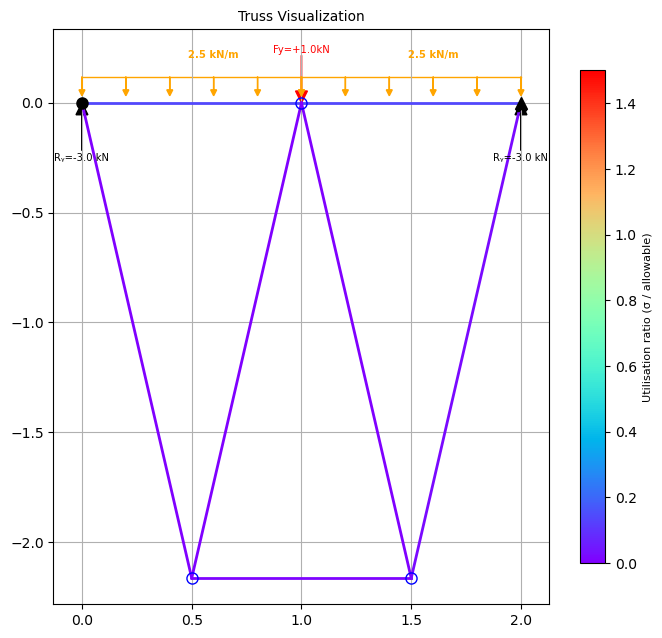

In [28]:
# STRUCTURAL RE-ANALYSIS

reactions2 = compute_support_reactions(nodes2, members2)
member_forces2 = solve_truss_joint_iteration(nodes2, members2)
member_moments2 = compute_member_bending_moments(members2)
max_stress2,stresses2 = calculate_stresses(members2)
utils2 = compute_utilisations(members2)

# Plot a figure of the new truss system
viz.visualize_truss(nodes2, members2, show_reactions=True, plot_loads=True, show_node_labels=True, show_forces=True, show_bending_moments=True, show_bending_moment_labels=False, moment_scale=0.1)
viz.visualize_truss(nodes2, members2, textscale=0.9, show_reactions=True, plot_loads=True, show_load_labels=True, show_utilisations=True, show_colorbar=True )


## 13. Finally: Save your new structure back to a DXF to import into AutoCAD

In [21]:
from import_functions import export_to_dxf

OUTPUT_DXF = "scaled_structure.dxf"

# save new structure
export_to_dxf(nodes, members, OUTPUT_DXF, units='mm')

=> DXF exported to scaled_structure.dxf
